## Imports

In [34]:
import numpy as np
import re
import pandas as pd
from langdetect import detect, LangDetectException

## Get Data

In [35]:

with open('/home/jeanluca/code/JeanLucaSchindler/FUSE/raw_data/E1.5. 16062024.txt', 'r') as file:
    content_5 = file.read()

with open('/home/jeanluca/code/JeanLucaSchindler/FUSE/raw_data/E1.6. 16062024.txt', 'r') as file:
    content_6 = file.read()

with open('/home/jeanluca/code/JeanLucaSchindler/FUSE/raw_data/E1.7. 16062024.txt', 'r') as file:
    content_7 = file.read()

## Get df

### content_5

In [36]:
pattern_5 = r'(E1\.5\.\S+)(.*?)(?=(E1\.5\.\S+)|$)'

matches_5 = re.findall(pattern_5, content_5, re.DOTALL)

data = {match[0]: match[1].strip() for match in matches_5}

df_5 = pd.DataFrame.from_dict(data, orient='index', columns=['text'])

In [37]:
df_5

,text
E1.5.A.,HOW MUCH OF JOY DO WE CONTROL?\nJoy and sadnes...
E1.5.A.1.,"""WYSIATI [What You See Is All There Is].\nThe ..."
E1.5.A.1.1.,"THE FOCUSSING ILLUSION\n""Nothing in life is as..."
E1.5.A.1.1_REF1_PSI,"""THE FOCUSSING ILLUSION. Any aspect of life to..."
E1.5.A.1.1_REF2_PSI,"""MISWANTING""\n""Daniel Gilbert and Timothy Wils..."
...,...
E1.5.F.7_REF1_PH,"""Qu'y a-t-il hors du cadre ?\n\nPREMIÈRE APPRO..."
E1.5.F.7_REF1.1_PH,"""LE DÉFAUT DU MONDE\n\nQuand il est parvenu à ..."
E1.5.F.7_REF1.1.a_PH,"""LE SENS, LA DÉPRESSION, LA JOIE\n\nIl n'en de..."
E1.5.F.7_REF2_PH,"""Anthropologie intérieure\n\nUN TERRAIN NOMMÉ ..."


### content_6

In [38]:
pattern_6 = r'(E1\.6\.\S+)(.*?)(?=(E1\.6\.\S+)|$)'

matches_6 = re.findall(pattern_6, content_6, re.DOTALL)

data = {match[0]: match[1].strip() for match in matches_6}

df_6 = pd.DataFrame.from_dict(data, orient='index', columns=['text'])

In [39]:
df_6

,text
E1.6.A.,LOVE AND FRIENDSHIP\nJoy in love comes from sh...
E1.6.A.1,DOES LOVE MAKE US HAPPY?
E1.6.A.1.1.,TRUE LOVE RESONATES IN THE WORLD\nWe marvel at...
E1.6.A.1.1.a.,"ECHOES OF HUMANITY: CELEBRATING LOVE, CONNECTI..."
E1.6.A.1.1.a_REF1_PO,"""Pourtant il nous reste à célébrer \ncomme tu ..."
...,...
E1.6.G.2.14_REF6_PO,"Erotic dreams remind us of the ecstasy of sex,..."
E1.6.G.2.14_REF6.1_PO,"""SALOMÉ\n\nInsónia rôxa. A luz a virgular-se e..."
E1.6.G.2.14_REF6.2_PO,"""CERTA VOZ NA NOITE, RUIVAMENTE...\n\nEsquivo ..."
E1.6.G.2.15.,SPIRITUAL PRACTICE CAN HELP BREAK THE CIRCLE O...


### content_7

In [40]:
pattern_7 = r'(E1\.7\.\S+)(.*?)(?=(E1\.7\.\S+)|$)'

matches_7 = re.findall(pattern_7, content_7, re.DOTALL)

data = {match[0]: match[1].strip() for match in matches_7}

df_7 = pd.DataFrame.from_dict(data, orient='index', columns=['text'])

In [41]:
df_7

,text
E1.7.A.,SPIRITUAL PRACTICES AIM TO ELIMINATE SUFFERING...
E1.7.A.1.,THE EXPERIENCE OF ETERNITY CAN ONLY TAKE PLACE...
E1.7.A.1.1.,THE EXPERIENCE OF THE ETERNAL NEITHER GIVES RI...
E1.7.A.1.1_REF1_PH.,"""Il importe assez peu, dans le présent context..."
E1.7.A.1.1_REF2_PO.,"""Les mots qui vont surgir savent de nous ce qu..."
...,...
E1.7.D.6.38.,"ELLA FRANCES SANDERS\n""A sense of wonder can f..."
E1.7.D.6.38_REF1_LIT,"""A sense of wonder can find you in many forms,..."
E1.7.D.6.39.,JOHN KOENIG\nUncommonly lovely invented words ...
E1.7.D.6.39._REF1_LIT,"“In language, all things are possible. Which m..."


### Final raw_df

In [42]:
total_df = pd.concat([df_5, df_6, df_7], ignore_index=False)

In [43]:
filtered_df = total_df[total_df.index.str.contains('REF') | (total_df['text'].str.split().str.len() >= 200)]

In [44]:
def remove_newlines(text):
    return text.replace('\n', ' ')

# Apply the function to the 'text' column
filtered_df['text'] = filtered_df['text'].apply(remove_newlines)

/tmp/ipykernel_48180/2241906798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['text'] = filtered_df['text'].apply(remove_newlines)


In [45]:
print(filtered_df.text.index[1000])
filtered_df.text.iloc[1000]

E1.6.D.1.4.a.ii.


'ENJOY THE FRUITS OF THE EARTH AND FEEL WONDERFULLY EXISTING IN THE FLESH "Descartes does not hesitate to conjecture that the first passion experienced by the soul when it insinuated itself into the fetal body was that of joy: « From the first moment that our soul was joined to the body, it is likely that it felt joy, and incontinently afterwards love... » (to Chanut, 1-2-47). [...] For this is how men live, not for the labors of understanding alone, but to enjoy the fruits of the earth and feel wonderfully existing in the flesh, which is the soul\'s true earthly residence, and from which it would be vain - Descartes is very close to Montaigne here - to try to escape, as some mystics illusorily attempt to. [...] « The mind must be entirely freed from all kinds of sad thoughts, and even from all kinds of serious meditations on the sciences, and occupied only with imitating those who, looking at the greenness of a wood, the colors of a flower, the flight of a bird, and such things that r

In [46]:
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'


filtered_df['language'] = filtered_df['text'].apply(detect_language)

/tmp/ipykernel_48180/1645582034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['language'] = filtered_df['text'].apply(detect_language)


In [47]:
filtered_df = filtered_df.rename_axis('index')
filtered_df

,text,language
index,,
E1.5.A.1.1_REF1_PSI,"""THE FOCUSSING ILLUSION. Any aspect of life to...",en
E1.5.A.1.1_REF2_PSI,"""MISWANTING"" ""Daniel Gilbert and Timothy Wilso...",en
E1.5.A.1.1_REF2.1_PH,Non-philosophers are unable to choose the good...,en
E1.5.A.1.1_REF2.1.a_PH,"""In Plato's myth of Er the Pamphylian, the bas...",en
E1.5.A.1.1_REF2.1.b_SONG,"Musical Illustration: Jacques Higelin, Tombé ...",en
...,...,...
E1.7.D.6.36_REF1_PO,"""BUT WE HAD MUSIC Right this minute across ti...",en
E1.7.D.6.37_REF1_SCI,"""Scientists theorize that the “soft fascinatio...",en
E1.7.D.6.38_REF1_LIT,"""A sense of wonder can find you in many forms,...",en


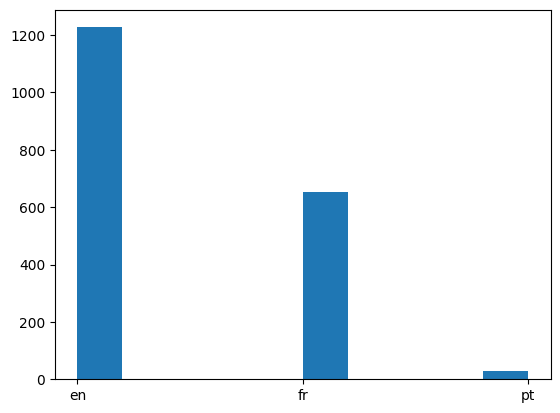

In [48]:
import matplotlib.pyplot as plt

plt.hist(filtered_df.language);

## Get different languages df

In [49]:
french_df = filtered_df[filtered_df.language == 'fr']
portuguese_df = filtered_df[filtered_df.language == 'pt']
french_df = french_df.drop(['language'], axis=1)
portuguese_df = portuguese_df.drop(['language'], axis=1)

In [50]:
# french_df.to_csv('french_texts.txt',encoding='utf-8',sep=' ', index=True)
# portuguese_df.to_csv('portuguese_texts.txt',encoding='utf-8',sep=' ', index=True)